<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/prediction/0908_%EC%95%84%ED%94%8C%EB%9D%BC%ED%86%A1%EC%8B%A0_LIMS_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%A1%B0%EC%83%81%EA%B5%AC_0909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 아포라톤신 예측시 검사종류와 식품유형에 대한 분석
- 아래 cross-entropy 분석 참고
- https://www.kaggle.com/code/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Save the modified DataFrame to a pickle file
import pandas as pd
data= pd.read_pickle('/content/drive/MyDrive/식약처/merged_df_no_original_target_pickle.pkl')
data = data[['INSPCT_PURPS_NAME', 'PRDLST_NM', 'JDGMNT_WORD_NAME_encoded']].copy()  # 범주형변수인 LIMS 데이터만 추출
data.head()

,INSPCT_PURPS_NAME,PRDLST_NM,JDGMNT_WORD_NAME_encoded
0,자가품질위탁검사,과자,0
1,자가품질위탁검사,과자,0
2,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),0
3,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),0
4,자가품질위탁검사,과자,0


In [26]:
data['PRDLST_NM'].nunique()

90

### 작업 1. 검사종류와 식품종류의 경우에 부적합율을 생성
#### - 부적합률이 0 인 검사종류와 식품종류는 제거
#### - 즉 여기에 해당되는 식품은 아폴라톡신이 나온 경우가 과거에 없으니 예측도 무조건 없다고 한다.

In [27]:
grouped_data = data.groupby(['INSPCT_PURPS_NAME', 'PRDLST_NM'])['JDGMNT_WORD_NAME_encoded'].mean().reset_index()
grouped_data

,INSPCT_PURPS_NAME,PRDLST_NM,JDGMNT_WORD_NAME_encoded
0,기타,건면,0.0
1,기타,고추장,0.0
2,기타,고춧가루,0.0
3,기타,고형차,0.0
4,기타,곡류가공품,0.0
...,...,...,...
189,품질검사,과자,0.0
190,품질검사,기타_999,0.0
191,품질검사,땅콩 또는 견과류가공품,0.0
192,품질검사,떡류,0.0


In [28]:
filtered_data = grouped_data[grouped_data['JDGMNT_WORD_NAME_encoded'] == 0]
display(filtered_data)

,INSPCT_PURPS_NAME,PRDLST_NM,JDGMNT_WORD_NAME_encoded
0,기타,건면,0.0
1,기타,고추장,0.0
2,기타,고춧가루,0.0
3,기타,고형차,0.0
4,기타,곡류가공품,0.0
...,...,...,...
189,품질검사,과자,0.0
190,품질검사,기타_999,0.0
191,품질검사,땅콩 또는 견과류가공품,0.0
192,품질검사,떡류,0.0


In [29]:
# Create a boolean mask for rows to keep
rows_to_keep = ~data.set_index(['INSPCT_PURPS_NAME', 'PRDLST_NM']).index.isin(filtered_data.set_index(['INSPCT_PURPS_NAME', 'PRDLST_NM']).index)

# Filter the original data DataFrame
data_filtered_removed = data[rows_to_keep].copy()

data_filtered_removed

,INSPCT_PURPS_NAME,PRDLST_NM,JDGMNT_WORD_NAME_encoded
0,자가품질위탁검사,과자,0
1,자가품질위탁검사,과자,0
2,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),0
3,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),0
4,자가품질위탁검사,과자,0
...,...,...,...
169086,기타,침출차,1
169235,기타,과자,0
169237,기타,과자,0
170023,기타,과자,0


In [31]:
data_filtered_removed['JDGMNT_WORD_NAME_encoded'].value_counts(normalize=True)

,proportion
JDGMNT_WORD_NAME_encoded,
0,0.995048
1,0.004952


### 작업 2. 검사종류와 식품종류의 값을 컬럼으로 변경
#### - 컬럼에 해당되면 True, 아니면 False

In [ ]:
data_encoded = pd.get_dummies(data_filtered_removed, columns=['INSPCT_PURPS_NAME', 'PRDLST_NM'], prefix=['INSPCT', 'PRDLST'])
display(data_encoded.head())

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_자가품질위탁검사,PRDLST_강황추출물(제2023-5호),PRDLST_고춧가루,PRDLST_곡류가공품,PRDLST_과.채가공품,PRDLST_과자,PRDLST_기타_999,...,PRDLST_우유,PRDLST_천연향신료,PRDLST_초콜릿가공품,PRDLST_침출차,PRDLST_캔디류,PRDLST_한식간장,PRDLST_한식된장,PRDLST_한식메주,PRDLST_혼합간장,PRDLST_효소식품
0,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data = data_encoded.copy()

In [ ]:
### 작업 3. 검사종류와 식품종류의 값을 컬럼으로 변경
#### - 컬럼에 해당되면 True, 아니면 False

In [ ]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

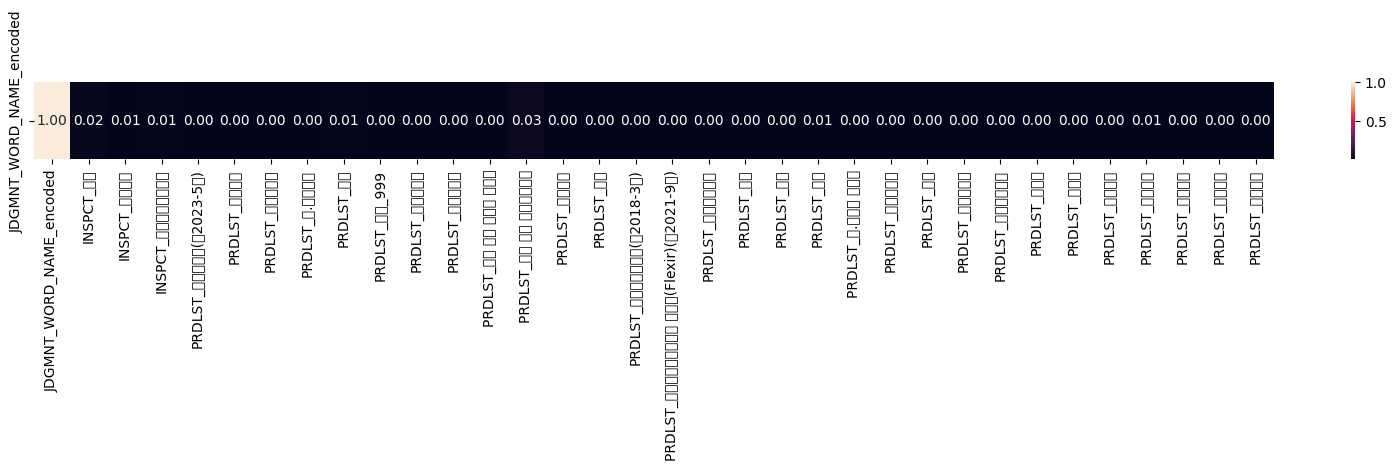

In [ ]:
from collections import Counter
import math
import scipy.stats as ss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

theilu = pd.DataFrame(index=['JDGMNT_WORD_NAME_encoded'], columns=data.columns)
columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['JDGMNT_WORD_NAME_encoded'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u

# Convert the DataFrame to float type
theilu = theilu.astype(float)

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

### LIMS 데이터와 부적합과는 연관성이 거의 없다.